# Syntetic Vortex Example

This example illustrates the use of the Vortector class and the structure of the input data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vortector import Vortector

## Creating a syntetic vortex

Vortices in PPDs appear as 2D Gaussians in the vortensity (minimum) and the surface density (maximum), we'll call it density from now on.

For a syntetic vortex, all we need to do is to set up a grid and put in a Gaussian distribution in both the vortensity and surface density.

### Creating a grid

In [2]:
# grid coordinates, use squared cells
ris = np.geomspace(1, 20, 122) # cell interfaces
phiis = np.linspace(-np.pi, np.pi, 252) # cell interfaces

# calculate cell centers, sizes
drs = ris[1:] - ris[:-1]
rs = 0.5*(ris[1:] + ris[:-1])
dphis = phiis[1:] - phiis[:-1]
phis = 0.5*(phiis[1:] + phiis[:-1])

# calculate cell area along the radial direction
area = dphis[0] * 0.5* (ris[1:]**2 - ris[:-1]**2)

# create meshgrids
Phis, Rs = np.meshgrid(phis, rs)
print("Rs.shape", Rs.shape)
print("Phis.shape", Phis.shape)

# calculate the area of the cells
Area = np.tile(area, (Rs.shape[1],1)).T
print("Area.shape", Area.shape)

Rs.shape (121, 251)
Phis.shape (121, 251)
Area.shape (121, 251)


### Syntetic data

Use a 2D gaussian as a model.

In [3]:
r_vort = 10
r_vort_sigma = 2
phi_vort = np.pi/4
phi_vort_sigma = np.pi/8

vorticity = 1 - 0.8*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)


density = 2 + 3*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)

vortensity = vorticity/density
vortensity = vortensity/np.max(vortensity)

## Examine the data

First look at the syntetic vortex in the r-phi plane.

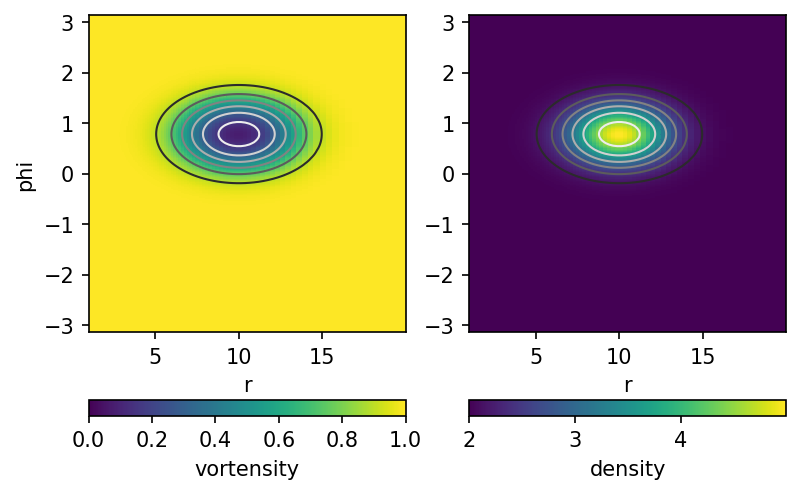

In [4]:
fig, axes = plt.subplots(1,2,dpi=150)

im = axes[0].pcolormesh(Rs, Phis, vortensity, vmin=0, vmax=1, shading="auto")
axes[0].contour(Rs, Phis, vortensity, cmap="Greys", linewidths=1)
axes[0].set_xlabel("r")
axes[0].set_ylabel("phi")
cbar = fig.colorbar(im, ax=axes[0], orientation="horizontal")
cbar.set_label("vortensity")

im = axes[1].pcolormesh(Rs, Phis, density, shading="auto")
axes[1].contour(Rs, Phis, vortensity, cmap="Greys", linewidths=1)
axes[1].set_xlabel("r")
cbar = fig.colorbar(im, ax=axes[1], orientation="horizontal")
cbar.set_label("density")


And looking down onto the disk.

<ipython-input-5-4edab190bf67>:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = axes[0].pcolormesh(X, Y, vortensity, vmin=0, vmax=1, shading="auto")
<ipython-input-5-4edab190bf67>:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = axes[1].pcolormesh(X, Y, density, shading="auto")


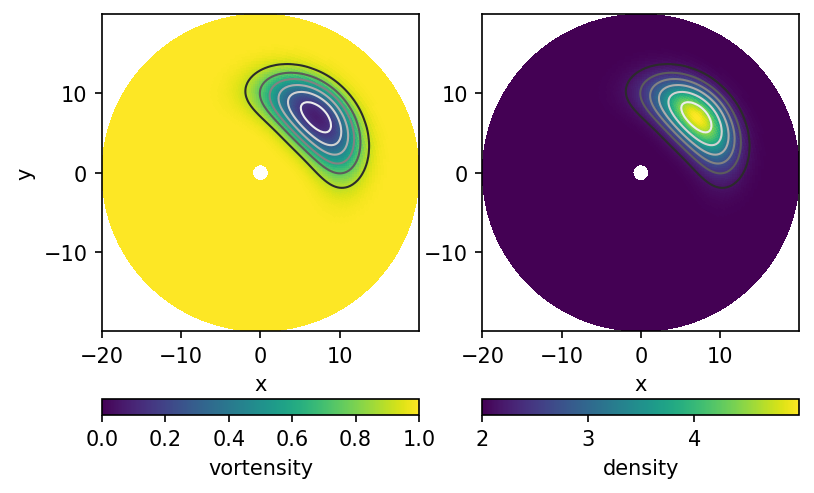

In [5]:
# Calculate cartesian cordinates
X = Rs*np.cos(Phis)
Y = Rs*np.sin(Phis)

fig, axes = plt.subplots(1,2,dpi=150)

im = axes[0].pcolormesh(X, Y, vortensity, vmin=0, vmax=1, shading="auto")
axes[0].contour(X, Y, vortensity, cmap="Greys", linewidths=1)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
cbar = fig.colorbar(im, ax=axes[0], orientation="horizontal")
cbar.set_label("vortensity")

im = axes[1].pcolormesh(X, Y, density, shading="auto")
axes[1].contour(X, Y, vortensity, cmap="Greys", linewidths=1)
axes[1].set_xlabel("x")
cbar = fig.colorbar(im, ax=axes[1], orientation="horizontal")
cbar.set_label("density")

## Using the vortector

In [6]:
vd = Vortector(Rs, Phis, Area, vortensity, density)
vortices = vd.detect(include_mask=True)

int_aspect 2.0


The output is a list of dictionaries.
Each dictionary contains an entry 'contour' which itself is a dictionary with info about the contour in the vortensity isovalue-lines plot which was identified as the vortex. See especially the 'stats' entry for useful info about physical properties.

If the Vortector was able to fit 2D Gaussians to the data, they are available in the 'fits' entry.

In [7]:
from pprint import pprint
pprint(vortices, compact=True, depth=4)

[{'contour': {'bottom': (95, 115),
              'detection': {'ancestors': [],
                            'bottom_img': (...),
                            'bounding_hor_img': array([1112,  605], dtype=int32),
                            'bounding_vert_img': array([ 877, 1312], dtype=int32),
                            'descendants': [...],
                            'dx_img': 507,
                            'dy_img': 435,
                            'ellipse': {...},
                            'ellipse_area_delta': 16616.064597475706,
                            'ellipse_area_delta_relative': 0.09880369618977958,
                            'left_img': (...),
                            'opencv_contour_number': 36,
                            'parameters': {...},
                            'pixel_arcLength': 1561.2316595315933,
                            'pixel_area': 168172.5,
                            'right_img': (...),
                            'top_img': (...)},
       

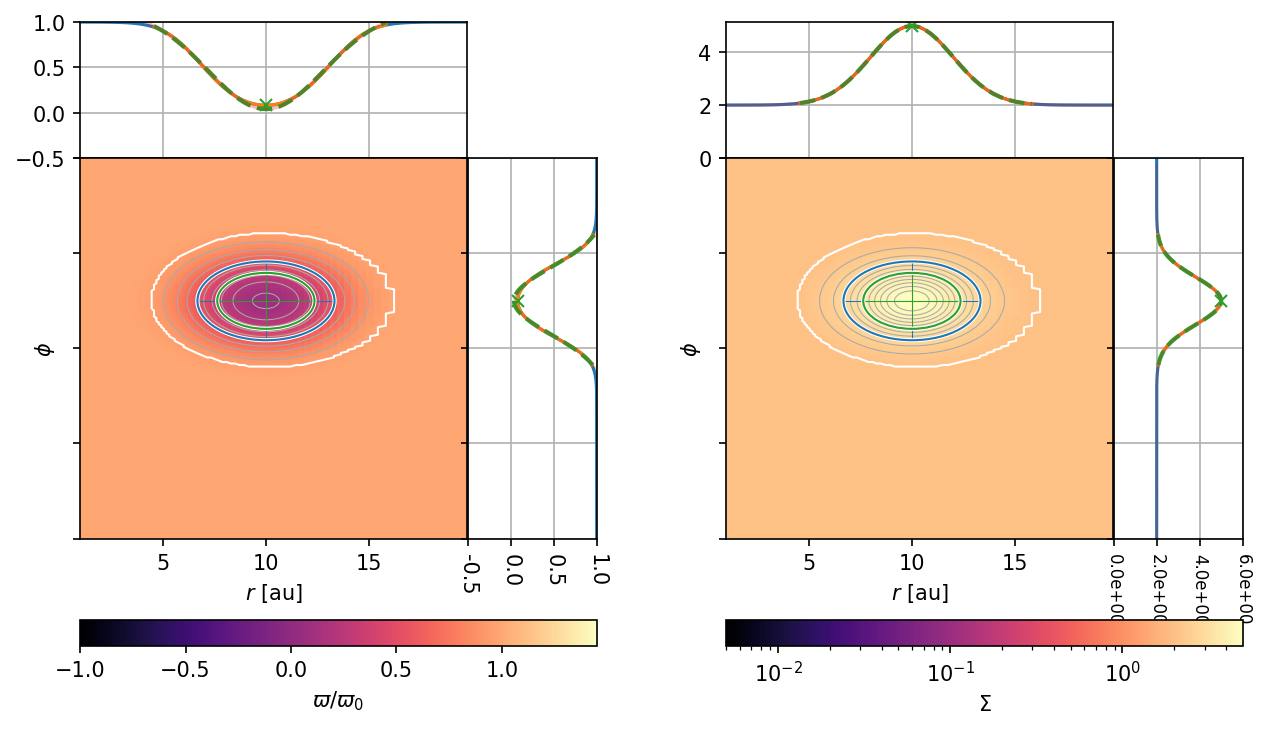

In [8]:
from src.vortector.visualize import show_fit_overview_2D
show_fit_overview_2D(vd)

## Multiple vortices

Let's add another vortex to illustrate the capability to detect more than one vortex.

In [9]:
r_vort = 10
r_vort_sigma = 2
phi_vort = np.pi/4
phi_vort_sigma = np.pi/8

vorticity = 1 - 0.8*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)
density = 2 + 3*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)

r_vort = 14
r_vort_sigma = 1
phi_vort = -np.pi/3
phi_vort_sigma = np.pi/8

vorticity -= 0.8*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)
density += 2*np.exp( - 0.5*(Rs-r_vort)**2/r_vort_sigma**2)*np.exp( - 0.5*(Phis-phi_vort)**2/phi_vort_sigma**2)

vortensity = vorticity/density
vortensity = vortensity/np.max(vortensity)

## Examine the data

First look at the syntetic vortex in the r-phi plane.

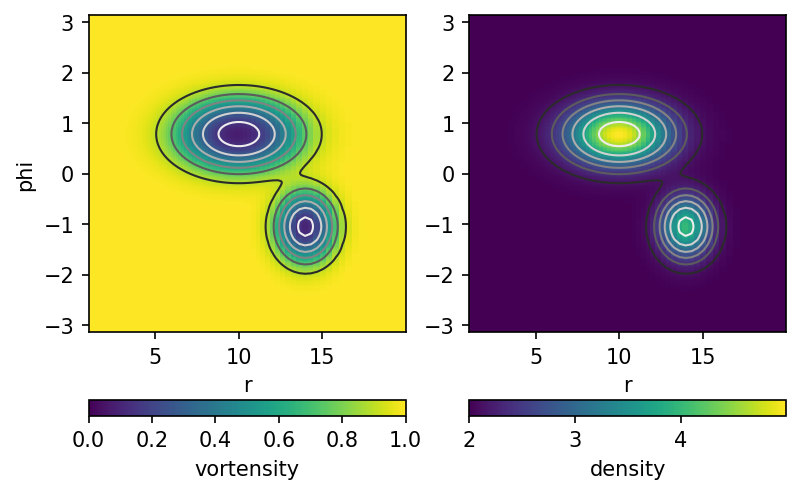

In [10]:
fig, axes = plt.subplots(1,2,dpi=150)

im = axes[0].pcolormesh(Rs, Phis, vortensity, vmin=0, vmax=1, shading="auto")
axes[0].contour(Rs, Phis, vortensity, cmap="Greys", linewidths=1)
axes[0].set_xlabel("r")
axes[0].set_ylabel("phi")
cbar = fig.colorbar(im, ax=axes[0], orientation="horizontal")
cbar.set_label("vortensity")

im = axes[1].pcolormesh(Rs, Phis, density, shading="auto")
axes[1].contour(Rs, Phis, vortensity, cmap="Greys", linewidths=1)
axes[1].set_xlabel("r")
cbar = fig.colorbar(im, ax=axes[1], orientation="horizontal")
cbar.set_label("density")


In [11]:
vd = Vortector(Rs, Phis, Area, vortensity, density)
vortices = vd.detect(include_mask=True, linear_radius=True)

int_aspect 2.0


Now, there should be two entries in the vortices list.

The vortices are sorted by the mass enclosed within the white contour.

In [12]:
from pprint import pprint
pprint(vortices, compact=True, depth=2)

[{'contour': {...}, 'fits': {...}}, {'contour': {...}, 'fits': {...}}]


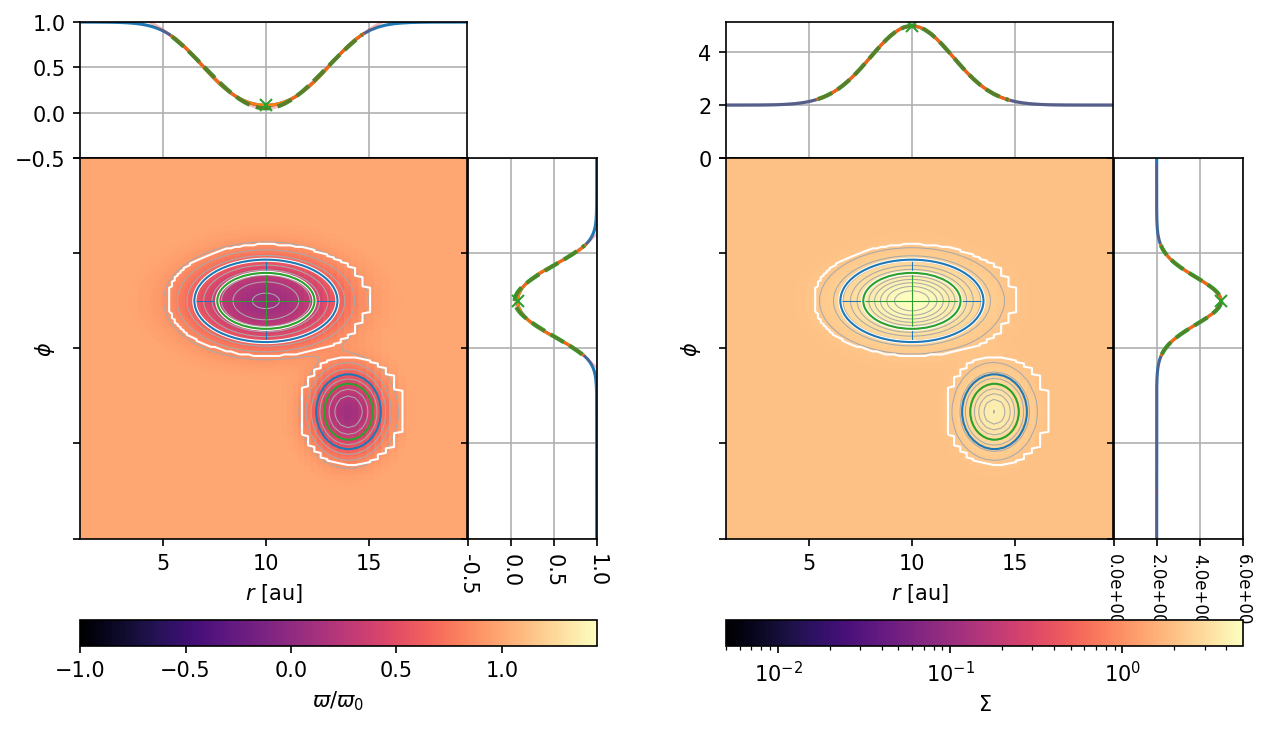

In [13]:
from src.vortector.visualize import show_fit_overview_2D
show_fit_overview_2D(vd)

By default the 2D overview shows the contour and fit ellipses at one full width at half maximum of all vortices.
A main vortex is selected (more massive are selected more likely, but ratio beteween minimum and azimuthal median vortensity also counts)
and a crosshair is drawn inside the ellipse. The 1D plots show slices through the data along the lines of the crosshair.

Other vortices can be selected by passing the keyword argument 'n' to the plot function.

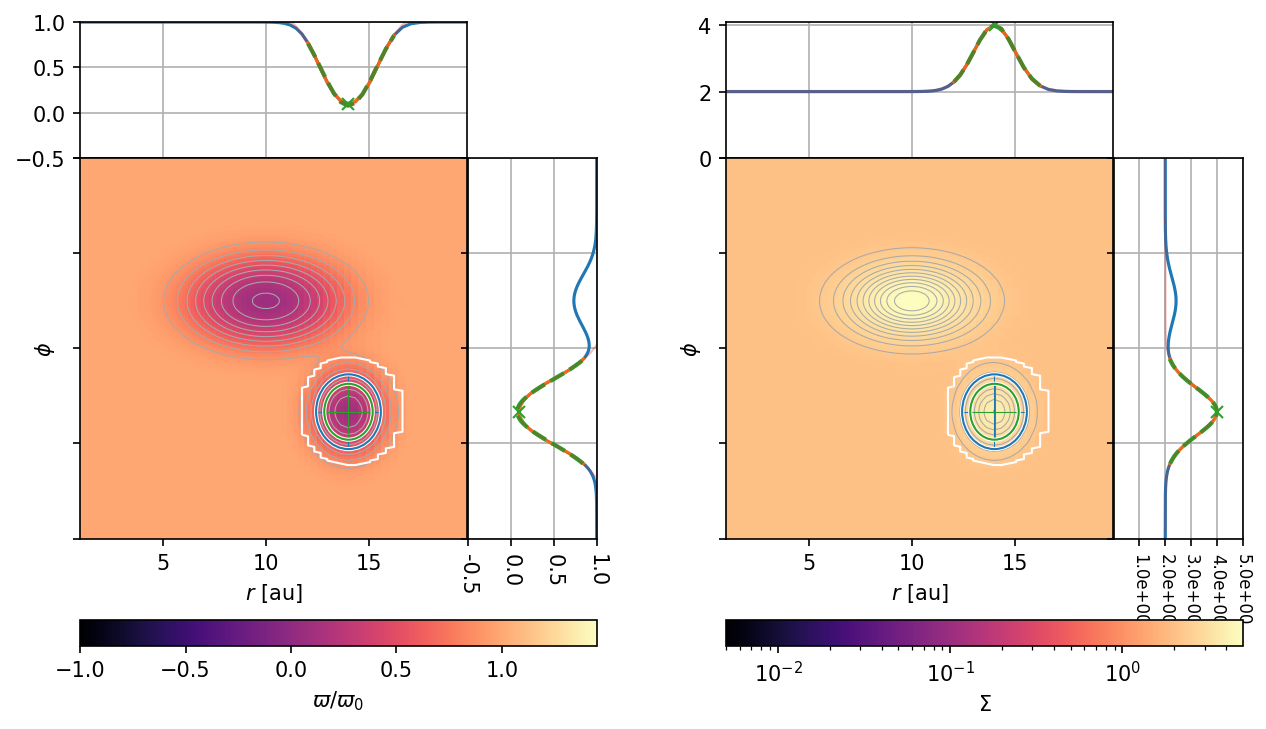

In [14]:
show_fit_overview_2D(vd, n=1)